<div style="background: linear-gradient(90deg, #e6f2ff 60%, #b3c6ff 100%); padding:28px; border-radius:16px; box-shadow:0 2px 8px #00004722;">
<img src='alinco.png' width="120" style="float:left; margin-right:28px; border-radius:8px; box-shadow:0 2px 8px #00004733;"/>
<div style="margin-left:150px;">
<h1 style="color:#000047; font-size:2.3em; margin-bottom:0;">Proyecto Final de Aplicación</h1>
<h2 style="color:#003366; font-size:1.3em; margin-top:0;">Clasificación de Géneros de Música</h2>
</div>
<br style="clear:both"/>
</div>

<div style="border-left:6px solid #000047; padding:18px; margin-top:18px; background:#f5f5f5; border-radius:8px;">
<span style="font-size:1.1em;"><b>Descripción:</b> Desarrolla un algoritmo de IA para clasificar automáticamente géneros musicales a partir de archivos de audio, utilizando características de dominio de frecuencia y tiempo. Se recomienda el uso del dataset <a href="https://drive.google.com/file/d/1Oy3SH2HM3QK0DSI0tF5FhzBKj7_CFVwL/view?usp=drive_link" target="_blank"><b>Music_Genre</b></a>.</span>
</div>

<div style="margin-top:18px; background:#f0f7ff; border-radius:8px; padding:14px; border:1px solid #b3c6ff;">
<b>Requerimientos:</b>
<ul style="margin-bottom:0;">
<li>Entrena una red y visualiza el progreso del <b>accuracy</b> en entrenamiento y validación.</li>
<li>Prueba distintas configuraciones de hiperparámetros para seleccionar la mejor.</li>
<li>Explica el funcionamiento y la razón de uso de la función de pérdida <b>categorical cross entropy</b>.</li>
</ul>
</div>

<div style="margin-top:18px; background:#fffbe6; border-radius:8px; padding:12px; border:1px solid #ffe066;">
<b>Condiciones de entrega:</b>
<ul>
<li>El proyecto se realiza en equipo.</li>
<li>Subir a la plataforma ALINCO un archivo <b>.zip</b> con el código, diapositivas y reporte.</li>
<li>Presentar el código y funcionamiento en una videollamada.</li>
</ul>
</div>

<div style="margin-top:18px; background:#e6ffe6; border-radius:8px; padding:12px; border:1px solid #66ff99;">
<b>Tip:</b> Documenta tu proceso, justifica tus decisiones y utiliza visualizaciones para mostrar resultados y mejoras.
</div>

## =================================================================

#                        Proyecto de Clasificación de Géneros de Música

## 1. PROBLEMA

**Planteamiento**: Considerando que se tiene una gran volumen de datos para organizar, buscar y seleccionar las canciones para que sea de forma precisa, se hace a través de clasificación musical con intervención humana, sea manual o sistemas ya no tan eficientes, en donde se pueda tomar en cuenta características o patrones acústicos con ritmo, timbre, melodía, frecuencia y energía, etc. los cuales permiten registrar esta clasificación en géneros como; blues, classical, country, disco, jazz, rock, metal, pop, hip-hop o reggae. Sin embargo, estas características o patrones no son tan evidentes y precisos por el humano, por lo que es necesario una estrategia poderosa con tecnología. 

Ante esta situación, surge la necesidad de desarrollar un modelo de inteligencia artificial capaz de analizar automáticamente señales de audio y clasificarlas en los géneros específicos, a partir de las características numéricas del dominio del tiempo y de la frecuencia, tales como MFCC, espectral centroid, zero crossing rate y otras métricas acústicas.

## 2. ACRONIMOS y GLOSARIO

* MFCC: Mel Frecuency Cepstral Coefficientes, coeficientes espectrales de frecuencia.
* ML: Machine Learning.
* Deep Learning: tipo de ML que usa redes neuronales profundas (multicapas).
* Categorical Cross Entropy: función de pérdida (loss function), diseñada para clasificación multiclase.

## 3. INTRODUCCIÓN

El Algoritmo consiste en crear un Modelo de Inteligencia Artificial de una Red Neuronal que permita identificar el "Género Musical", usando datos previamente procesados extraídos de un archivo de audio, almacenados en un dataset conviertiendolas en las características relevantes de audio. Para ello, use el dataset "features_30_sec.csv", el cual ya tiene características extraídas y no necesita procesar audio o imagen. 

De acuerdo a los recursos y características se diseña y refiere a la arquitectura de una **Red Neuronal Densa** porque hay conexión entre todas las neuronas y multicapa **Red Neuronal Multicapas Perceptron (MLP)**, porque tiene varias capas; de entrada, ocultas y de salida, el tipo de red neuronal feed-forward.


#### Arquitectura



#### Características:
- Tiempo: RMS, tempo, amplitud (ancho de banda).
- Frecuencia: MFCC, espectro, cromagrama.
Estos datos (variables) son representaciones matemáticas para Machine Learning-->Deep Learning.

## 4. PROYECTO

* Preparación de datos: cargar el dataset, labels, one-hot.
* Modelo: Uso de Keras (Red Neuronal Densa (densa con varias capas) Multilayer Perceptron - MLP).
* Hiperparámetros: neuronas, batch, epochs.
* Configuración de Entrenamiento: categorical cross entropy.
* Visualización: accuracy, loss, gráficas.
* Evaluación
* Predicción: ejemplo con un género.


#### Requerimientos:
- Dataset features_30_sec.csv
- Instalación de Entorno Ambiente Virtual, Tensor Flow + Keras, y las librerías (pandas, numpy, matplotlib) mediante CMD Anaconda.
- Jupyter Notebook 

## 5. CÓDIGO

#### *Verificar e Importar Librerías*

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns

#### *Carga de los dataset en un DataFrame y revisar estructura*

In [2]:
df_f30 = pd.read_csv('Music_Genre_Data/features_30_sec.csv')
df_f30.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 1000 non-null   object 
 1   length                   1000 non-null   int64  
 2   chroma_stft_mean         1000 non-null   float64
 3   chroma_stft_var          1000 non-null   float64
 4   rms_mean                 1000 non-null   float64
 5   rms_var                  1000 non-null   float64
 6   spectral_centroid_mean   1000 non-null   float64
 7   spectral_centroid_var    1000 non-null   float64
 8   spectral_bandwidth_mean  1000 non-null   float64
 9   spectral_bandwidth_var   1000 non-null   float64
 10  rolloff_mean             1000 non-null   float64
 11  rolloff_var              1000 non-null   float64
 12  zero_crossing_rate_mean  1000 non-null   float64
 13  zero_crossing_rate_var   1000 non-null   float64
 14  harmony_mean             

In [3]:
df_f30.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [4]:
df_gp= df_f30.groupby(['label']).count() # para identificar cuántos datos hay por género.
df_gp

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
label,,,,,,,,,,,,,,,,,,,,,
blues,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
classical,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
country,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
disco,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
hiphop,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
jazz,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
metal,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
pop,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
reggae,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100


In [5]:
df_f3 = pd.read_csv('Music_Genre_Data/features_3_sec.csv')
df_f3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 9990 non-null   object 
 1   length                   9990 non-null   int64  
 2   chroma_stft_mean         9990 non-null   float64
 3   chroma_stft_var          9990 non-null   float64
 4   rms_mean                 9990 non-null   float64
 5   rms_var                  9990 non-null   float64
 6   spectral_centroid_mean   9990 non-null   float64
 7   spectral_centroid_var    9990 non-null   float64
 8   spectral_bandwidth_mean  9990 non-null   float64
 9   spectral_bandwidth_var   9990 non-null   float64
 10  rolloff_mean             9990 non-null   float64
 11  rolloff_var              9990 non-null   float64
 12  zero_crossing_rate_mean  9990 non-null   float64
 13  zero_crossing_rate_var   9990 non-null   float64
 14  harmony_mean            

In [6]:
df_f3.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


Para un mejor manejo de datos seleccione el dataset features_30_sec.csv, DataFrame df_f30, aunque son menos registros es mayor el tiempo.

#### *Separar características y etiquetas, así como su codificación y one-hot*

In [7]:
X = df_f30.drop(columns=["filename","label"])
y = df_f30["label"]

In [8]:
X

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,...,0.752740,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035
1,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,...,0.927998,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282
2,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,...,2.451690,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025
3,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,...,0.780874,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339
4,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,...,-4.520576,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,661794,0.352063,0.080487,0.079486,0.000345,2008.149458,282174.689224,2106.541053,88609.749506,4253.557033,...,1.789867,45.050526,-13.289984,41.754955,2.484145,36.778877,-6.713265,54.866825,-1.193787,49.950665
996,661794,0.398687,0.075086,0.076458,0.000588,2006.843354,182114.709510,2068.942009,82426.016726,4149.338328,...,3.739020,33.851742,-10.848309,39.395096,1.881229,32.010040,-7.461491,39.196327,-2.795338,31.773624
997,661794,0.432142,0.075268,0.081651,0.000322,2077.526598,231657.968040,1927.293153,74717.124394,4031.405321,...,1.838090,33.597008,-12.845291,36.367264,3.440978,36.001110,-12.588070,42.502201,-2.106337,29.865515
998,661794,0.362485,0.091506,0.083860,0.001211,1398.699344,240318.731073,1818.450280,109090.207161,3015.631004,...,-2.812176,46.324894,-4.416050,43.583942,1.556207,34.331261,-5.041897,47.227180,-3.590644,41.299088


In [9]:
y

0      blues
1      blues
2      blues
3      blues
4      blues
       ...  
995     rock
996     rock
997     rock
998     rock
999     rock
Name: label, Length: 1000, dtype: object

In [10]:
y.unique()

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

In [11]:
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_one_hot = to_categorical(y_encoded) #One-hot encoding usando softmax

In [12]:
y_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,

In [13]:
y_one_hot

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], shape=(1000, 10))

In [55]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X)
X_test = scaler.transform(X_test)

In [53]:
X_train

array([[-0.13282213, -0.35013678,  0.31258717, ..., -0.30059734,
         0.60406407, -0.51298758],
       [-0.13282213, -0.46248155,  1.11757233, ..., -0.40708699,
         0.42412706, -0.53842129],
       [-0.13282213, -0.18422456, -0.13770124, ..., -0.52729705,
        -0.29618888, -0.8749539 ],
       ...,
       [-0.13282213,  0.65463736, -1.43198917, ..., -0.63865065,
        -0.26361549, -0.89060474],
       [-0.13282213, -0.19833855,  0.66814351, ..., -0.5114848 ,
        -0.65064889, -0.63768256],
       [-0.13282213, -0.2483391 , -0.05894495, ...,  0.16033426,
         0.5868411 , -0.4526752 ]], shape=(1000, 58))

In [56]:
X_test

array([[-0.29545278,  0.36842216,  1.32939085, ..., -0.3265077 ,
         0.42061917, -0.38801523],
       [-0.13282213,  0.46462133, -1.62783094, ..., -1.21512928,
        -0.28443775, -1.030505  ],
       [-0.29545278,  0.94148426, -1.97857661, ..., -1.03655316,
         0.74777567, -0.92546704],
       ...,
       [-0.13282213, -0.44425982,  0.73679856, ...,  0.19077583,
        -0.90757934, -0.6164886 ],
       [-0.13282213,  0.59523746, -0.80426036, ..., -0.75385817,
         0.90606228, -0.21484734],
       [-0.29545278,  0.71617944,  0.03008025, ...,  0.72708929,
         0.78018876,  1.79577879]], shape=(200, 58))

#### *Train - Test*

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, stratify= y_one_hot, random_state=42)

#### *Estandarización*

In [17]:
X_train

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
475,661794,0.451151,0.096722,0.191646,0.014995,3140.810674,1.781900e+06,2849.980909,136864.067076,6336.698754,...,-0.436722,55.174568,-4.118448,53.688320,-1.104125,47.380569,-0.124494,46.204937,-2.755772,45.098331
704,661504,0.384296,0.083575,0.211175,0.002561,2753.120791,7.178949e+05,2861.501507,149359.339153,5986.680118,...,-2.959882,47.624577,-1.329443,36.215866,-0.874240,43.780357,0.691995,53.095066,-1.774849,48.859238
64,661794,0.332650,0.080392,0.117432,0.000546,2553.361183,1.078556e+05,2280.266170,32817.073100,5148.375700,...,6.113826,39.085434,-13.147977,44.355339,3.931494,47.963306,-7.612429,43.358826,3.752393,40.883690
403,661504,0.467288,0.091837,0.266418,0.013460,2492.860234,4.953543e+05,2330.007272,194898.652582,5125.560164,...,10.470063,102.317482,0.637127,60.690502,0.261578,62.055466,-5.102053,57.268295,-4.016594,57.155560
402,661504,0.404255,0.092196,0.093516,0.001122,1490.156547,6.335591e+05,1909.978526,233181.638022,3093.278769,...,1.266359,54.918308,-6.975131,61.616516,0.395021,41.194897,-2.430323,41.611870,-2.932962,38.757835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,661794,0.269690,0.094989,0.080624,0.002829,1420.365165,1.999590e+05,1731.164281,81354.261510,2929.964495,...,-5.540558,77.410767,-6.887469,93.530945,-4.823252,65.716705,1.747367,78.390366,-1.882196,131.138275
646,661794,0.482436,0.075207,0.212496,0.000567,2795.223327,9.566532e+04,2321.669987,28374.880591,5455.028164,...,7.668679,32.542507,-8.689568,25.735662,3.171215,25.679869,-6.837353,26.338881,3.886339,25.471832
30,661794,0.263194,0.094373,0.170062,0.003188,1379.189382,5.509804e+05,2004.210663,269867.234656,3016.513649,...,-15.540495,85.731583,-15.332039,78.006058,-9.656509,97.278809,-10.089768,55.413876,-17.826880,91.008377
606,661504,0.434033,0.080115,0.050472,0.000103,3236.925340,3.466549e+05,2572.749034,73955.590892,6227.983557,...,5.556734,54.096462,-12.473878,56.196770,6.361197,54.973270,-3.853356,51.176369,4.722446,54.393253


In [18]:
print("Train shape:", X_train.shape)

Train shape: (800, 58)


In [19]:
X_test

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
871,661504,0.408769,0.096618,0.150835,0.004892,3110.220723,1.814941e+06,2852.735496,268500.906438,6393.354560,...,0.902099,48.285610,2.223237,45.917774,3.382898,67.073578,-2.665890,54.100197,0.517763,52.585522
992,661794,0.416625,0.073754,0.106913,0.000215,2471.353263,1.086464e+05,2102.155349,25982.821385,4687.127162,...,0.824449,25.989548,-15.053774,21.858854,-1.606128,23.771255,-16.089317,21.082539,-2.186192,23.541199
370,661504,0.455567,0.071043,0.111058,0.001390,2449.233952,2.124428e+05,2311.546095,63068.667098,5184.480870,...,4.795847,34.281670,-7.947639,29.266712,2.295927,30.748188,-7.119019,27.717720,1.772437,28.289534
435,668140,0.529564,0.085259,0.192016,0.008478,2827.182593,1.106380e+06,2834.021985,166814.573645,6196.513335,...,4.561324,42.842754,-2.374953,42.817745,5.449449,50.280964,2.790354,44.081024,3.654336,43.613140
921,661794,0.392916,0.079877,0.161519,0.002532,2158.206042,2.493733e+05,2060.799798,61939.044457,4245.912995,...,2.491813,40.079136,-10.934321,43.736401,0.707046,45.832993,-0.676344,39.171604,-0.066027,44.903893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,661504,0.451825,0.085256,0.240985,0.008035,3238.215472,6.352632e+05,2954.126414,167148.237400,6701.364299,...,-0.603374,47.259617,-2.177770,38.882034,-1.600560,51.832035,-0.616253,57.315872,-4.048588,53.083454
769,661504,0.496824,0.074074,0.215618,0.004502,2327.245000,3.265259e+05,2516.662861,78395.655193,4929.579704,...,1.102296,22.247259,-1.573124,23.980988,-0.257949,30.213509,0.121787,25.661821,0.426622,22.277958
806,661794,0.342402,0.092036,0.105104,0.002585,1417.837118,5.458619e+05,1704.350704,246814.403006,2880.253272,...,-2.539477,65.196358,-6.093459,65.956787,2.484671,65.181229,-6.171945,73.320404,-4.575994,42.257179
83,661794,0.427291,0.080122,0.251242,0.003459,2314.927762,1.439096e+05,2261.811875,30962.565644,5036.454670,...,9.251259,35.322044,-4.049325,47.890514,3.256568,53.179390,-3.465543,38.221546,2.379480,60.413731


In [20]:
print("Test shape:", X_test.shape)

Test shape: (200, 58)


#### *Construcción del Modelo MLP*

model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax') 
])
model.summary()

In [28]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax') 
])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 128)                 │           7,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,458 (64.29 KB)

 Trainable params: 16,458 (64.29 KB)

 Non-trainable params: 0 (0.00 B)

#### *Categorical Cross Entropy*

In [29]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [30]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

#### *Entrenamiento del modelo*

In [31]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, callbacks=[early_stop])

Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.1125 - loss: 178007.6406 - val_accuracy: 0.1813 - val_loss: 63059.8828
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1141 - loss: 102490.5703 - val_accuracy: 0.1875 - val_loss: 13655.8076
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1531 - loss: 48947.3438 - val_accuracy: 0.1625 - val_loss: 1788.2952
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1078 - loss: 23718.3164 - val_accuracy: 0.1562 - val_loss: 235.2758
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1406 - loss: 10891.8027 - val_accuracy: 0.1625 - val_loss: 98.3957
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1187 - loss: 4696.4521 - val_accuracy: 0.1500 - val_loss: 17.6461
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1203 - loss: 4049.7339 - val_accuracy: 0.1125 - val_loss: 2.8769
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1016 - los

In [32]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stop])

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1187 - loss: 1360.2502 - val_accuracy: 0.0938 - val_loss: 4.3624
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1094 - loss: 1086.3635 - val_accuracy: 0.0938 - val_loss: 6.2829
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1047 - loss: 834.0389 - val_accuracy: 0.1125 - val_loss: 2.2619
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1297 - loss: 614.0480 - val_accuracy: 0.0812 - val_loss: 2.2620
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0969 - loss: 342.4757 - val_accuracy: 0.1125 - val_loss: 2.2620
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1063 - loss: 489.8662 - val_accuracy: 0.0625 - val_loss: 2.2867
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1109 - loss: 518.5966 - val_accuracy: 0.0750 - val_loss: 2.2769
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1141 - loss: 166.6861 - val_accuracy: 

#### *Gráfica Accuracy y Loss*

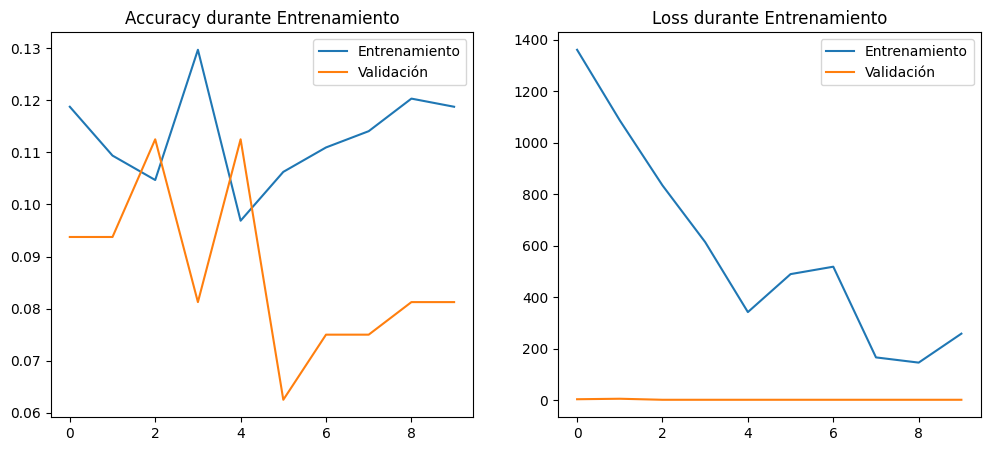

In [33]:
#Accuracy
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Accuracy durante Entrenamiento')
plt.legend()


#Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label = 'Entrenamiento')
plt.plot(history.history['val_loss'], label = 'Validación')
plt.title('Loss durante Entrenamiento')
plt.legend()

plt.show()

#### *Evaluación del Modelo*

In [34]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f'Precisión Final del Modelo: {test_accuracy:.2%}')
print(f'Pérdida Final del Modelo: {test_loss}')


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1000 - loss: 3.9017 
Precisión Final del Modelo: 10.00%
Pérdida Final del Modelo: 3.9016666412353516


#### *Predicción*

In [35]:
predictions = model.predict(X_test[:5])
print("Predicciones:", predictions.argmax(axis=1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Predicciones: [6 6 6 6 6]


#### *Visualizaciones*

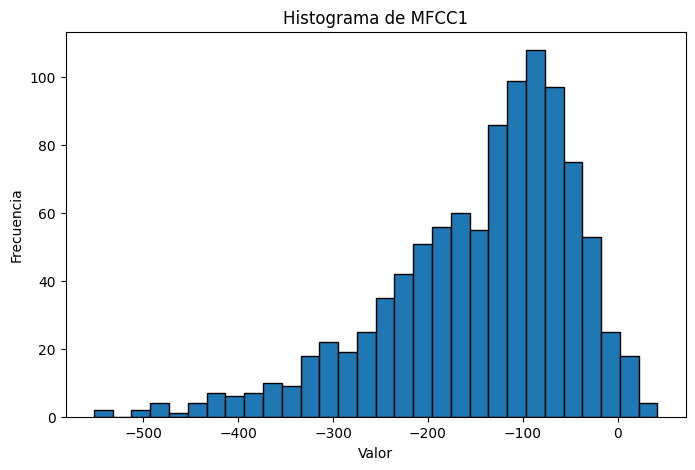

In [36]:

plt.figure(figsize=(8,5))
plt.hist(df_f30['mfcc1_mean'], bins=30, edgecolor="black")
plt.title("Histograma de MFCC1")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.show()

El histograma representa los valores de la característica "mfcc1_mean" MFCC1 Promedio de cada audio, se observa que es una distribución con valores sesgados a la izquierda.

Generación de histogramas para todas las columnas numéricas del DataFrame (features) en una sola visualización, para observar la distribución de los valores por cada columna(variable), permite ver; datos sesgados, outliers, si la distribución es normal, uniforme o multimodal.

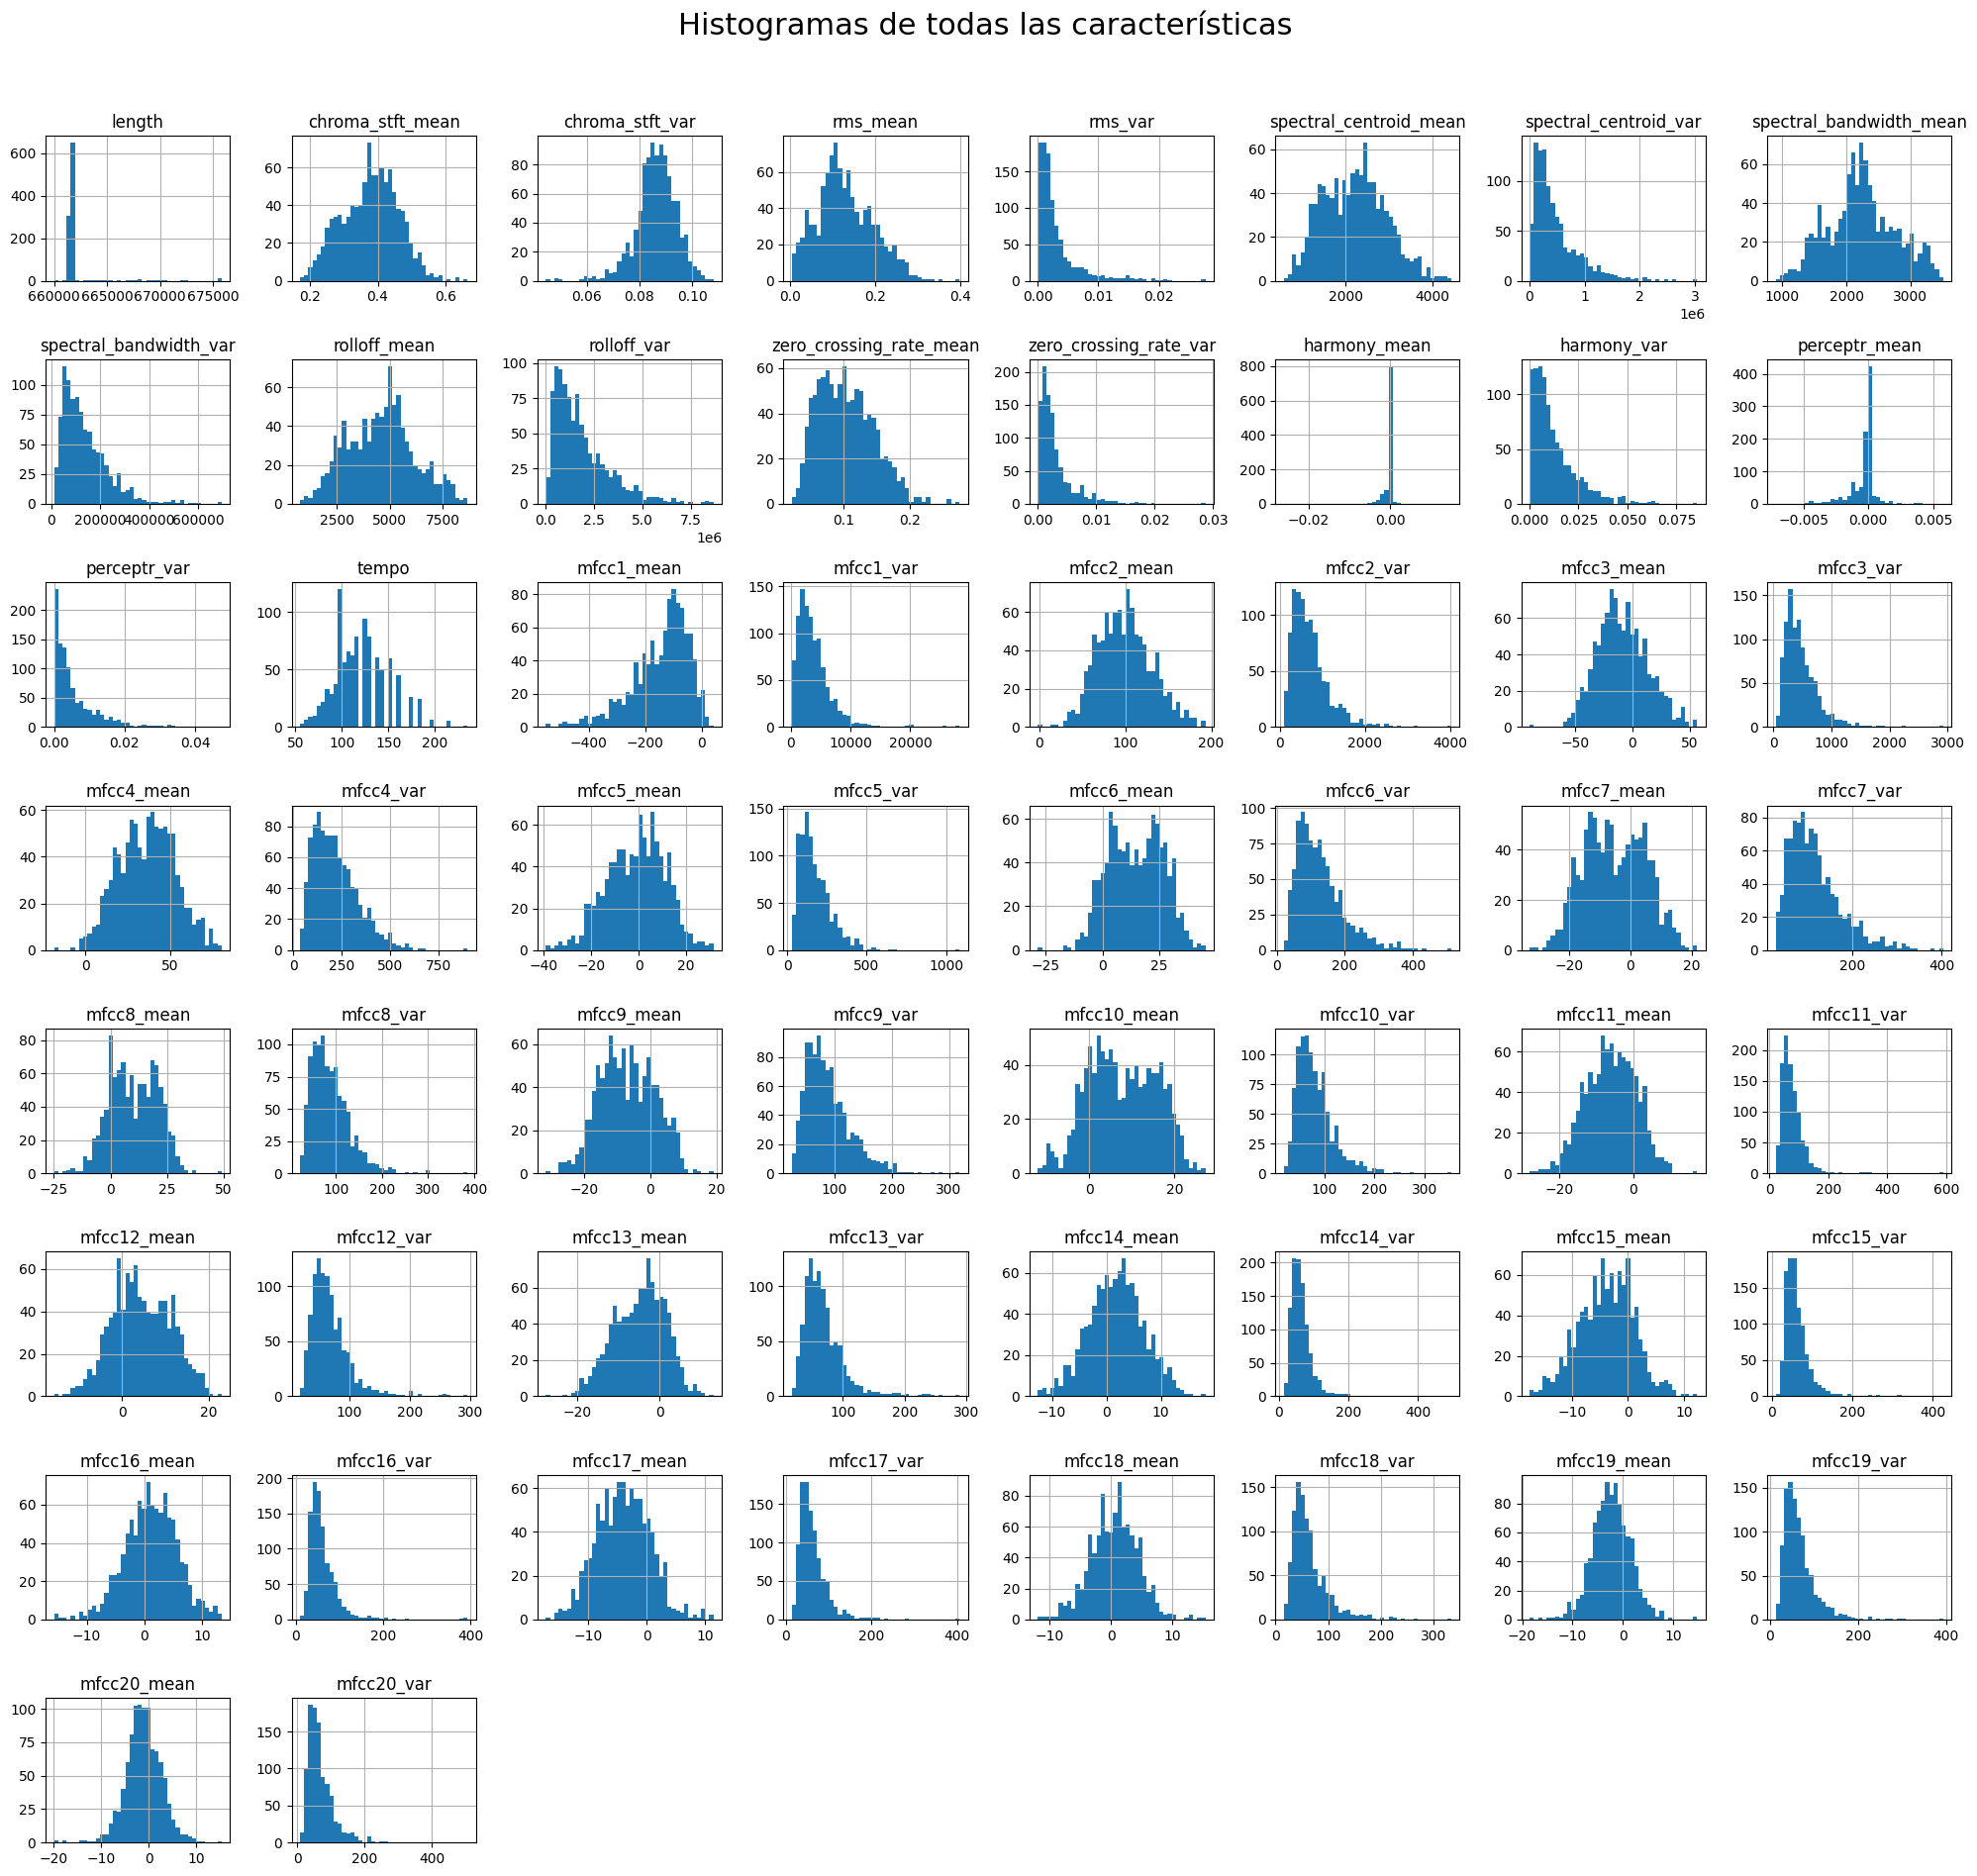

In [49]:
df_f30.hist(figsize=(20,18), bins=40)
plt.tight_layout(rect=[0, 0, 1, 1])
plt.suptitle("Histogramas de todas las características", fontsize=22, y=1.05)
plt.show()


Forma de campana (normal): buena señal para entrenamiento.
Sesgado hacia un lado: podría requerir normalización.